In [1]:
!pip list

#!pip uninstall tensorflow -y
#!pip uninstall tf-nightly -y

import sys
print(sys.version)

#!pip install tf-nightly-gpu

#https://github.com/tensorflow/tensorflow/issues/37659 reason for nightly

#tensorflo was 2.6.2 downgrade to 1.5.0 via https://www.mlfairy.com/blog/2020/01/31/lstm-coreml/
#keras was  2.6.0, downgrade to 2.2.5 

#!pip uninstall tensorflow -y
#!pip uninstall keras -y

#!pip install keras==2.2.5
#!pip install tensorflow==2.2.0 #try 2.3.1


#!pip install 'h5py==2.10.0' --force-reinstall


# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Package                               Version               Editable project location
------------------------------------- --------------------- -------------------------
absl-py                               0.15.0
accelerate                            0.5.1
access                                1.1.3
affine                                2.3.0
aiobotocore                           2.1.2
aiohttp                               3.8.1
aioitertools                          0.10.0
aiosignal                             1.2.0
albumentations                        1.1.0
alembic                               1.7.7
allennlp                              2.9.1
altair                                4.2.0
annoy                                 1.17.0
ansiwrap                              0.8.4
anyio                                 3.4.0
apache-beam                           2.34.0
aplus                                 0.11.0
appdirs                               1.4.4
argcomplete                    

In [2]:
#imports
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf # ML/DL
import keras
from keras.models import Sequential
from tensorflow.keras.layers import LSTM
from keras.layers import Activation, Dense, Dropout
import matplotlib.pyplot as plt
import tqdm
import pickle

#tf.compat.v1.enable_eager_execution()
import tensorflow_addons as tfa
#import coremltools as ct

In [3]:
df = pd.read_csv(os.path.join('../input/newencoded/encodedNew.csv'))
#df.drop(axis=1,columns=df.columns[9],inplace=True)
df.head()

d/l  pu  tpu  rpu  su  tsu  rsu  sq  tsq  rsq  bp  tbp  rbp
0    4   8   10   18  25   35   42  56   70    2  63   80    0
1    1   3   25   28   3   15   61   7   50    6   6   50   25
2    2  21   55   19  24   70   10  10   30    2  13   40   27
3    2  12   30   45  12   35    6   8   25    7  28   80    0
4    4  11   15   53  12   15    5  20   25   36  48   60   17

In [4]:
STOP_SIGN = "␣"   
allWorkoutsString = []


##NEW SHUFFLING TO FIX POOR EARLY PERFORMANCE
print(df.head())
df = df.sample(frac = 1)
print(df.head())
##NEW SHUFFLING TO FIX POOR EARLY PERFORMANCE

for i in range(len(df)):
    workout = (str(df.iloc[i]["d/l"]) + "-DL:~" + str(df.iloc[i]["pu"]) + "~" + str(df.iloc[i]["tpu"]) + "~" + str(df.iloc[i]["rpu"]) + "~" + str(df.iloc[i]["su"]) + "~" + str(df.iloc[i]["tsu"]) + "~" + str(df.iloc[i]["rsu"]) + "~" + str(df.iloc[i]["sq"]) + "~" + str(df.iloc[i]["tsq"]) + "~" + str(df.iloc[i]["rsq"]) + "~"  +  str(df.iloc[i]["bp"]) + "~" + str(df.iloc[i]["tbp"]) + "~" + str(df.iloc[i]["rbp"]) + "~" + "␣" )
    allWorkoutsString.append(workout)
    
for j in range(15):
    print(allWorkoutsString[j])




   d/l  pu  tpu  rpu  su  tsu  rsu  sq  tsq  rsq  bp  tbp  rbp
0    4   8   10   18  25   35   42  56   70    2  63   80    0
1    1   3   25   28   3   15   61   7   50    6   6   50   25
2    2  21   55   19  24   70   10  10   30    2  13   40   27
3    2  12   30   45  12   35    6   8   25    7  28   80    0
4    4  11   15   53  12   15    5  20   25   36  48   60   17
      d/l  pu  tpu  rpu  su  tsu  rsu  sq  tsq  rsq  bp  tbp  rbp
1404    3  21   40   40  14   25   26  39   65    7  36   65    9
355     2  14   40   12  23   65    3  20   50   21  14   35    8
634     4  47   60    1  35   45    0  24   30    9   8   10   67
598     3  27   45   27  39   65    5  38   65    6   9   15   52
177     2  12   35    0  13   35    1  28   70   10   8   20   32
3-DL:~21~40~40~14~25~26~39~65~7~36~65~9~␣
2-DL:~14~40~12~23~65~3~20~50~21~14~35~8~␣
4-DL:~47~60~1~35~45~0~24~30~9~8~10~67~␣
3-DL:~27~45~27~39~65~5~38~65~6~9~15~52~␣
2-DL:~12~35~0~13~35~1~28~70~10~8~20~32~␣
2-DL:~18~50~9~17~50~

In [5]:
def decodeWorkout(input):    
    c = input.split("~")
    if(len(c) == 5):
        pushupStr = str(c[0] + "\n" + c[1] + " pushups for " + c[2] + " seconds with " + c[3] + " second rest ")
        outputStr = (pushupStr)
    elif(len(c) == 8):
        pushupStr = str(c[0] + "\n" + c[1] + " pushups for " + c[2] + " seconds with " + c[3] + " second rest ")
        situpStr = str("\n" + c[4] + " situps for " + c[5] + " seconds with " + c[6] + " second rest ")
        outputStr = (pushupStr + situpStr)
    elif(len(c)==11):
        pushupStr = str(c[0] + "\n" + c[1] + " pushups for " + c[2] + " seconds with " + c[3] + " second rest ")
        situpStr = str("\n" + c[4] + " situps for " + c[5] + " seconds with " + c[6] + " second rest ")
        squatStr = str("\n" + c[7] + " squats for " + c[8] + " seconds with " + c[9] + " second rest ")
        outputStr = (pushupStr + situpStr + squatStr)
    elif(len(c) == 14):
        pushupStr = str(c[0] + "\n" + c[1] + " pushups for " + c[2] + " seconds with " + c[3] + " second rest ")
        situpStr = str("\n" + c[4] + " situps for " + c[5] + " seconds with " + c[6] + " second rest ")
        squatStr = str("\n" + c[7] + " squats for " + c[8] + " seconds with " + c[9] + " second rest ")
        burpeeStr = str("\n" + c[10] + " burpees for " + c[11] + " seconds with " + c[12] + " second rest ")
        outputStr = (pushupStr + situpStr + squatStr + burpeeStr)
    else:
        outputStr = "fail"
    
    return outputStr
for i in range(15) :
        print(decodeWorkout(allWorkoutsString[i]))


3-DL:
21 pushups for 40 seconds with 40 second rest 
14 situps for 25 seconds with 26 second rest 
39 squats for 65 seconds with 7 second rest 
36 burpees for 65 seconds with 9 second rest 
2-DL:
14 pushups for 40 seconds with 12 second rest 
23 situps for 65 seconds with 3 second rest 
20 squats for 50 seconds with 21 second rest 
14 burpees for 35 seconds with 8 second rest 
4-DL:
47 pushups for 60 seconds with 1 second rest 
35 situps for 45 seconds with 0 second rest 
24 squats for 30 seconds with 9 second rest 
8 burpees for 10 seconds with 67 second rest 
3-DL:
27 pushups for 45 seconds with 27 second rest 
39 situps for 65 seconds with 5 second rest 
38 squats for 65 seconds with 6 second rest 
9 burpees for 15 seconds with 52 second rest 
2-DL:
12 pushups for 35 seconds with 0 second rest 
13 situps for 35 seconds with 1 second rest 
28 squats for 70 seconds with 10 second rest 
8 burpees for 20 seconds with 32 second rest 
2-DL:
18 pushups for 50 seconds with 9 second rest 
17

In [6]:
#encoding each of the characters into integers so the model can understand -> paying special attention to the stop_sign
tokenizer = tf.keras.preprocessing.text.Tokenizer(
    char_level=True, #could attempt to make this non-char level
    filters='',
    lower=False,
    split=''
)
# Stop word is not a part of workouts, but tokenizer must know about it as well.
#tokenizer.fit_on_texts([STOP_SIGN]) #come back
tokenizer.fit_on_texts(allWorkoutsString)
tokenizer.get_config()

# saving
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)


In [7]:
VOCABULARY_SIZE = len(tokenizer.word_counts) + 1 #idk why its +1
print('VOCABULARY_SIZE: ', VOCABULARY_SIZE)

VOCABULARY_SIZE:  17


In [8]:
dataset_vectorized = tokenizer.texts_to_sequences(allWorkoutsString)
print('Vectorized dataset size', len(dataset_vectorized))


Vectorized dataset size 1500


In [9]:
def decodeVector(vector):
    decodedWorkout = tokenizer.sequences_to_texts([vector])[0]
    print(decodedWorkout)
    
#basic test to see if the decoder is working
decodeVector(dataset_vectorized[0])

3 - D L : ~ 2 1 ~ 4 0 ~ 4 0 ~ 1 4 ~ 2 5 ~ 2 6 ~ 3 9 ~ 6 5 ~ 7 ~ 3 6 ~ 6 5 ~ 9 ~ ␣


In [10]:
#add padding to ensure same length --- only if all are not the sane length
print(len(dataset_vectorized))
maxLength = 0
for workout_index, workout in enumerate(dataset_vectorized[:len(dataset_vectorized)]):
    #if(len(workout)) != 167:
    if(maxLength < len(workout)):
        #print('Workout #{} length: {}'.format(workout_index + 1, len(workout)))
        maxLength = len(workout)
#padding is required
print(maxLength)

1500
43


In [11]:
dataset_vectorized_padded_without_stops = tf.keras.preprocessing.sequence.pad_sequences(
    dataset_vectorized,
    padding='post',
    truncating='post',
    # We use -1 here and +1 in the next step to make sure
    # that all recipes will have at least 1 stops sign at the end,
    # since each sequence will be shifted and truncated afterwards
    # (to generate X and Y sequences).
    maxlen=maxLength-1,
    #value=tokenizer.texts_to_sequences([STOP_SIGN])[0]
)
dataset_vectorized_padded = tf.keras.preprocessing.sequence.pad_sequences(
    dataset_vectorized_padded_without_stops,
    padding='post',
    truncating='post',
    maxlen=maxLength+1,
    #value=tokenizer.texts_to_sequences([STOP_SIGN])[0]
)

for workout_index, workout in enumerate(dataset_vectorized_padded[:len(dataset_vectorized_padded)]):
    if(len(workout)) != maxLength+1:
        print('Workout #{} length: {}'.format(workout_index + 1, len(workout)))

#test it out
decodeVector(dataset_vectorized_padded[0])

3 - D L : ~ 2 1 ~ 4 0 ~ 4 0 ~ 1 4 ~ 2 5 ~ 2 6 ~ 3 9 ~ 6 5 ~ 7 ~ 3 6 ~ 6 5 ~ 9 ~ ␣


In [12]:
#converting to tensors
dataset = tf.data.Dataset.from_tensor_slices(dataset_vectorized_padded)

#confirming the concept
#for workout in dataset.take(1):
#    print('Raw workout:\n', workout.numpy(), '\n\n\n')
#    print('Stringified workout:\n')
#    decodeVector(workout.numpy())
#doesnt work with my downgraded tensorflow and keras

2022-04-23 15:41:21.785292: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-23 15:41:21.901393: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-23 15:41:21.902574: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-23 15:41:21.906891: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [13]:
#split processing
def split_input_target(workout):
    input_text = workout[:-1]
    target_text = workout[1:]
    
    return input_text, target_text
dataset_targeted = dataset.map(split_input_target)
print(dataset_targeted)

<MapDataset shapes: ((43,), (43,)), types: (tf.int32, tf.int32)>


In [14]:
#??

#downgraded tensorflow and keras prevents this from working


#for input_example, target_example in dataset_targeted.take(1):
#    print('Input sequence size:', repr(len(input_example.numpy())))
#    print('Target sequence size:', repr(len(target_example.numpy())))
#    print()
#    
#    input_stringified = tokenizer.sequences_to_texts([input_example.numpy()[:50]])[0]
#    target_stringified = tokenizer.sequences_to_texts([target_example.numpy()[:50]])[0]
#    
#    print('Input:  ', repr(''.join(input_stringified)))
#    print('Target: ', repr(''.join(target_stringified)))
#
#
#for i, (input_idx, target_idx) in enumerate(zip(input_example[:10], target_example[:10])):
#    print('Step {:2d}'.format(i + 1))
#    print('  input: {} ({:s})'.format(input_idx, repr(tokenizer.sequences_to_texts([[input_idx.numpy()]])[0])))
#    print('  expected output: {} ({:s})'.format(target_idx, repr(tokenizer.sequences_to_texts([[target_idx.numpy()]])[0])))

In [15]:
print(dataset_targeted)

total_workouts_num = len(df)
print('total_workouts_num : ', total_workouts_num)
print('maxLength: ', maxLength)
print('VOCABULARY_SIZE: ', VOCABULARY_SIZE)

<MapDataset shapes: ((43,), (43,)), types: (tf.int32, tf.int32)>
total_workouts_num :  1500
maxLength:  43
VOCABULARY_SIZE:  17


In [16]:
# Batch size.
BATCH_SIZE = 64 
# Buffer size to shuffle the dataset (TF data is designed to work
# with possibly infinite sequences, so it doesn't attempt to shuffle
# the entire sequence in memory. Instead, it maintains a buffer in
# which it shuffles elements).
SHUFFLE_BUFFER_SIZE = 1000
dataset_train = dataset_targeted \
  .shuffle(SHUFFLE_BUFFER_SIZE) \
  .batch(BATCH_SIZE, drop_remainder=True) \
  .repeat()
print(dataset_train)

<RepeatDataset shapes: ((64, 43), (64, 43)), types: (tf.int32, tf.int32)>


In [17]:
#embedding layer
tmp_vocab_size = 10
tmp_embedding_size = 5
tmp_input_length = 8
tmp_batch_size = 2
tmp_model = tf.keras.models.Sequential()
tmp_model.add(tf.keras.layers.Embedding(
  input_dim=tmp_vocab_size,
  output_dim=tmp_embedding_size,
  input_length=tmp_input_length
))
# The model will take as input an integer matrix of size (batch, input_length).
# The largest integer (i.e. word index) in the input should be no larger than 9 (tmp_vocab_size).
# Now model.output_shape == (None, 10, 64), where None is the batch dimension.
tmp_input_array = np.random.randint(
  low=0,
  high=tmp_vocab_size,
  size=(tmp_batch_size, tmp_input_length) #come back
)
tmp_model.compile('rmsprop', 'mse')
tmp_output_array = tmp_model.predict(tmp_input_array)
print('tmp_input_array shape:', tmp_input_array.shape)
print('tmp_input_array:')
print(tmp_input_array)
print()
print('tmp_output_array shape:', tmp_output_array.shape)
print('tmp_output_array:')
print(tmp_output_array)

tmp_input_array shape: (2, 8)
tmp_input_array:
[[6 6 3 2 5 7 6 8]
 [7 8 8 8 9 6 7 7]]

tmp_output_array shape: (2, 8, 5)
tmp_output_array:
[[[-0.01533601 -0.00899401  0.04414071 -0.04781169 -0.01122576]
  [-0.01533601 -0.00899401  0.04414071 -0.04781169 -0.01122576]
  [ 0.00690144 -0.00540959 -0.02713462 -0.02023295 -0.03580463]
  [-0.01847287  0.00280778  0.04217878 -0.03835375 -0.03274069]
  [ 0.00795801 -0.03141345 -0.03340523 -0.00774968  0.0066868 ]
  [ 0.0089274   0.0132856   0.04282108  0.00155865 -0.01016481]
  [-0.01533601 -0.00899401  0.04414071 -0.04781169 -0.01122576]
  [-0.03615491  0.0343146  -0.00423211  0.01236024  0.03883499]]

 [[ 0.0089274   0.0132856   0.04282108  0.00155865 -0.01016481]
  [-0.03615491  0.0343146  -0.00423211  0.01236024  0.03883499]
  [-0.03615491  0.0343146  -0.00423211  0.01236024  0.03883499]
  [-0.03615491  0.0343146  -0.00423211  0.01236024  0.03883499]
  [-0.02344099  0.02321965  0.02603544  0.03399955  0.00860228]
  [-0.01533601 -0.00899401 

2022-04-23 15:41:25.364104: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


In [18]:
#LSTM model -> review

def build_model(vocab_size, embedding_dim, rnn_units, batch_size):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Embedding(
        input_dim=vocab_size,
        output_dim=embedding_dim,
        batch_input_shape=[batch_size, None]
    ))
    model.add(tf.keras.layers.LSTM(
        units=rnn_units,
        return_sequences=True,
        stateful=True, #look into this causing the issue potentially, originally was True
        recurrent_initializer=tf.keras.initializers.GlorotNormal() #used to be be tf.keras.initializers.GlorotNormal() before downgradingf
    )) # temp removed
    model.add(tf.keras.layers.Dense(vocab_size))
    
    return model
model = build_model(
  vocab_size=VOCABULARY_SIZE,
  embedding_dim=256,
  rnn_units=1024,
  batch_size=BATCH_SIZE
)
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (64, None, 256)           4352      
_________________________________________________________________
lstm (LSTM)                  (64, None, 1024)          5246976   
_________________________________________________________________
dense (Dense)                (64, None, 17)            17425     
Total params: 5,268,753
Trainable params: 5,268,753
Non-trainable params: 0
_________________________________________________________________


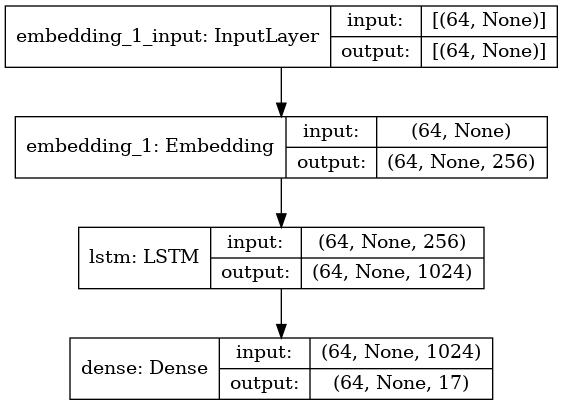

In [19]:
#plotting the model itself
tf.keras.utils.plot_model(
    model,
    show_shapes=True,
    show_layer_names=True,
    to_file='model.png'
)

In [20]:
#opt, loss funct. 
# An objective function.
# The function is any callable with the signature scalar_loss = fn(y_true, y_pred).
def loss(labels, logits):
    entropy = tf.keras.losses.sparse_categorical_crossentropy(
      y_true=labels,
      y_pred=logits,
      from_logits=True
    )
    
    return entropy
#compile

adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001) #used to be 0.001 which worked much better
model.compile(
    optimizer=adam_optimizer,
    loss=loss
)

early_stopping_callback = tf.keras.callbacks.EarlyStopping(
    patience=5,
    monitor='loss',
    restore_best_weights=True,
    verbose=1
)

In [21]:
# Create a checkpoints directory. TO SAVE AND CONTINUE TRAINING
checkpoint_dir = 'tmp/checkpoints'
os.makedirs(checkpoint_dir, exist_ok=True)
checkpoint_prefix = os.path.join(checkpoint_dir, 'ckpt_') #used to be ckpt_{epoch}, got rid due to space issues on kaggle
checkpoint_callback=tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_prefix,
    save_weights_only=True
)

tqdm_callback = tfa.callbacks.TQDMProgressBar()

In [22]:
#const
EPOCHS = 400 #1.3k seemed to work well
INITIAL_EPOCH = 1
STEPS_PER_EPOCH = int(len(df)/BATCH_SIZE)
print('EPOCHS:          ', EPOCHS) 
print('INITIAL_EPOCH:   ', INITIAL_EPOCH)
print('STEPS_PER_EPOCH: ', STEPS_PER_EPOCH) #default was 1500

EPOCHS:           400
INITIAL_EPOCH:    1
STEPS_PER_EPOCH:  23


In [23]:
history = model.fit(
    x=dataset_train,
    epochs=EPOCHS,
    steps_per_epoch=STEPS_PER_EPOCH,
    initial_epoch=INITIAL_EPOCH,
    callbacks=[
        checkpoint_callback,
        tqdm_callback
       # early_stopping_callback #we want to overfit this so get rid of early stopping
    ]
)
# Saving the trained model to file (to be able to re-use it later).
model_name = 'LSTM_WORKOUT_GEN_0.1_raw.h5'
#model.save(model_name, save_format='h5')
#model.save(f"{model_name}~AFTERTRAIN")

Training:   0%|           0/400 ETA: ?s,  ?epochs/s

Epoch 2/400
Epoch 2/400


0/23           ETA: ?s - 

2022-04-23 15:41:30.304112: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


23/23 [==============================] - 5s 26ms/step - loss: 2.4634
Epoch 3/400
Epoch 3/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 25ms/step - loss: 1.7004
Epoch 4/400
Epoch 4/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 1.2754
Epoch 5/400
Epoch 5/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 25ms/step - loss: 1.0848
Epoch 6/400
Epoch 6/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 1.0271
Epoch 7/400
Epoch 7/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.9982
Epoch 8/400
Epoch 8/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 25ms/step - loss: 0.9648
Epoch 9/400
Epoch 9/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 27ms/step - loss: 0.9354
Epoch 10/400
Epoch 10/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 27ms/step - loss: 0.9114
Epoch 11/400
Epoch 11/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 27ms/step - loss: 0.8966
Epoch 12/400
Epoch 12/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.8809
Epoch 13/400
Epoch 13/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.8735
Epoch 14/400
Epoch 14/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.8967
Epoch 15/400
Epoch 15/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 27ms/step - loss: 0.8499
Epoch 16/400
Epoch 16/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.8288
Epoch 17/400
Epoch 17/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 25ms/step - loss: 0.8057
Epoch 18/400
Epoch 18/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 25ms/step - loss: 0.7990
Epoch 19/400
Epoch 19/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 25ms/step - loss: 0.7785
Epoch 20/400
Epoch 20/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.7685
Epoch 21/400
Epoch 21/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.7596
Epoch 22/400
Epoch 22/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.7596
Epoch 23/400
Epoch 23/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 35ms/step - loss: 0.7546
Epoch 24/400
Epoch 24/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 28ms/step - loss: 0.7362
Epoch 25/400
Epoch 25/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.7293
Epoch 26/400
Epoch 26/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 28ms/step - loss: 0.7230
Epoch 27/400
Epoch 27/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.7201
Epoch 28/400
Epoch 28/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 27ms/step - loss: 0.7151
Epoch 29/400
Epoch 29/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.7118
Epoch 30/400
Epoch 30/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.7088
Epoch 31/400
Epoch 31/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.7000
Epoch 32/400
Epoch 32/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.6964
Epoch 33/400
Epoch 33/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.7023
Epoch 34/400
Epoch 34/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 27ms/step - loss: 0.6947
Epoch 35/400
Epoch 35/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.6865
Epoch 36/400
Epoch 36/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 25ms/step - loss: 0.6806
Epoch 37/400
Epoch 37/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.6770
Epoch 38/400
Epoch 38/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.6722
Epoch 39/400
Epoch 39/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 25ms/step - loss: 0.6699
Epoch 40/400
Epoch 40/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.6658
Epoch 41/400
Epoch 41/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.6599
Epoch 42/400
Epoch 42/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 25ms/step - loss: 0.6571
Epoch 43/400
Epoch 43/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 25ms/step - loss: 0.6526
Epoch 44/400
Epoch 44/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.6431
Epoch 45/400
Epoch 45/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.6352
Epoch 46/400
Epoch 46/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.6283
Epoch 47/400
Epoch 47/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 28ms/step - loss: 0.6198
Epoch 48/400
Epoch 48/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 25ms/step - loss: 0.6100
Epoch 49/400
Epoch 49/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.6009
Epoch 50/400
Epoch 50/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 27ms/step - loss: 0.5927
Epoch 51/400
Epoch 51/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 25ms/step - loss: 0.5791
Epoch 52/400
Epoch 52/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 25ms/step - loss: 0.5626
Epoch 53/400
Epoch 53/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.5508
Epoch 54/400
Epoch 54/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.5333
Epoch 55/400
Epoch 55/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.5160
Epoch 56/400
Epoch 56/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.4950
Epoch 57/400
Epoch 57/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.4782
Epoch 58/400
Epoch 58/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.4581
Epoch 59/400
Epoch 59/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 36ms/step - loss: 0.4321
Epoch 60/400
Epoch 60/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 27ms/step - loss: 0.4219
Epoch 61/400
Epoch 61/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.3943
Epoch 62/400
Epoch 62/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 25ms/step - loss: 0.3614
Epoch 63/400
Epoch 63/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.3317
Epoch 64/400
Epoch 64/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 28ms/step - loss: 0.3121
Epoch 65/400
Epoch 65/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.2930
Epoch 66/400
Epoch 66/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.2698
Epoch 67/400
Epoch 67/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.2531
Epoch 68/400
Epoch 68/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.2438
Epoch 69/400
Epoch 69/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.2302
Epoch 70/400
Epoch 70/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 27ms/step - loss: 0.2161
Epoch 71/400
Epoch 71/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 28ms/step - loss: 0.2048
Epoch 72/400
Epoch 72/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1984
Epoch 73/400
Epoch 73/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 27ms/step - loss: 0.1924
Epoch 74/400
Epoch 74/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1902
Epoch 75/400
Epoch 75/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1852
Epoch 76/400
Epoch 76/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1807
Epoch 77/400
Epoch 77/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1757
Epoch 78/400
Epoch 78/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 25ms/step - loss: 0.1724
Epoch 79/400
Epoch 79/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1709
Epoch 80/400
Epoch 80/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1697
Epoch 81/400
Epoch 81/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1671
Epoch 82/400
Epoch 82/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 25ms/step - loss: 0.1651
Epoch 83/400
Epoch 83/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 27ms/step - loss: 0.1632
Epoch 84/400
Epoch 84/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1631
Epoch 85/400
Epoch 85/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1621
Epoch 86/400
Epoch 86/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1615
Epoch 87/400
Epoch 87/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1598
Epoch 88/400
Epoch 88/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 25ms/step - loss: 0.1590
Epoch 89/400
Epoch 89/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1586
Epoch 90/400
Epoch 90/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1578
Epoch 91/400
Epoch 91/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1580
Epoch 92/400
Epoch 92/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 27ms/step - loss: 0.1567
Epoch 93/400
Epoch 93/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1567
Epoch 94/400
Epoch 94/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 29ms/step - loss: 0.1566
Epoch 95/400
Epoch 95/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 30ms/step - loss: 0.1567
Epoch 96/400
Epoch 96/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 27ms/step - loss: 0.1553
Epoch 97/400
Epoch 97/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 28ms/step - loss: 0.1549
Epoch 98/400
Epoch 98/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1549
Epoch 99/400
Epoch 99/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1552
Epoch 100/400
Epoch 100/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 25ms/step - loss: 0.1541
Epoch 101/400
Epoch 101/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1543
Epoch 102/400
Epoch 102/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1544
Epoch 103/400
Epoch 103/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1530
Epoch 104/400
Epoch 104/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 25ms/step - loss: 0.1527
Epoch 105/400
Epoch 105/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1532
Epoch 106/400
Epoch 106/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 28ms/step - loss: 0.1518
Epoch 107/400
Epoch 107/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 25ms/step - loss: 0.1511
Epoch 108/400
Epoch 108/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1517
Epoch 109/400
Epoch 109/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 25ms/step - loss: 0.1510
Epoch 110/400
Epoch 110/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 25ms/step - loss: 0.1507
Epoch 111/400
Epoch 111/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 25ms/step - loss: 0.1511
Epoch 112/400
Epoch 112/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 25ms/step - loss: 0.1511
Epoch 113/400
Epoch 113/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1504
Epoch 114/400
Epoch 114/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1505
Epoch 115/400
Epoch 115/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1497
Epoch 116/400
Epoch 116/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 25ms/step - loss: 0.1496
Epoch 117/400
Epoch 117/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 25ms/step - loss: 0.1502
Epoch 118/400
Epoch 118/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 28ms/step - loss: 0.1499
Epoch 119/400
Epoch 119/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1492
Epoch 120/400
Epoch 120/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 25ms/step - loss: 0.1501
Epoch 121/400
Epoch 121/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 25ms/step - loss: 0.1490
Epoch 122/400
Epoch 122/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1479
Epoch 123/400
Epoch 123/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1487
Epoch 124/400
Epoch 124/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 25ms/step - loss: 0.1485
Epoch 125/400
Epoch 125/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 27ms/step - loss: 0.1486
Epoch 126/400
Epoch 126/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1481
Epoch 127/400
Epoch 127/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1490
Epoch 128/400
Epoch 128/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 25ms/step - loss: 0.1481
Epoch 129/400
Epoch 129/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 25ms/step - loss: 0.1477
Epoch 130/400
Epoch 130/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1477
Epoch 131/400
Epoch 131/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 38ms/step - loss: 0.1481
Epoch 132/400
Epoch 132/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 27ms/step - loss: 0.1477
Epoch 133/400
Epoch 133/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 25ms/step - loss: 0.1485
Epoch 134/400
Epoch 134/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1480
Epoch 135/400
Epoch 135/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 25ms/step - loss: 0.1479
Epoch 136/400
Epoch 136/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1499
Epoch 137/400
Epoch 137/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 25ms/step - loss: 0.1588
Epoch 138/400
Epoch 138/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.4302
Epoch 139/400
Epoch 139/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.5996
Epoch 140/400
Epoch 140/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.3392
Epoch 141/400
Epoch 141/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.2243
Epoch 142/400
Epoch 142/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 28ms/step - loss: 0.1797
Epoch 143/400
Epoch 143/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 25ms/step - loss: 0.1631
Epoch 144/400
Epoch 144/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1558
Epoch 145/400
Epoch 145/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1527
Epoch 146/400
Epoch 146/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1516
Epoch 147/400
Epoch 147/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1505
Epoch 148/400
Epoch 148/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1499
Epoch 149/400
Epoch 149/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 25ms/step - loss: 0.1485
Epoch 150/400
Epoch 150/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 27ms/step - loss: 0.1481
Epoch 151/400
Epoch 151/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1477
Epoch 152/400
Epoch 152/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1473
Epoch 153/400
Epoch 153/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1474
Epoch 154/400
Epoch 154/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 28ms/step - loss: 0.1471
Epoch 155/400
Epoch 155/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 27ms/step - loss: 0.1470
Epoch 156/400
Epoch 156/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 27ms/step - loss: 0.1472
Epoch 157/400
Epoch 157/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1473
Epoch 158/400
Epoch 158/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1464
Epoch 159/400
Epoch 159/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1464
Epoch 160/400
Epoch 160/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1458
Epoch 161/400
Epoch 161/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 25ms/step - loss: 0.1457
Epoch 162/400
Epoch 162/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1455
Epoch 163/400
Epoch 163/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1455
Epoch 164/400
Epoch 164/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1454
Epoch 165/400
Epoch 165/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 25ms/step - loss: 0.1456
Epoch 166/400
Epoch 166/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1456
Epoch 167/400
Epoch 167/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 34ms/step - loss: 0.1452
Epoch 168/400
Epoch 168/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 27ms/step - loss: 0.1457
Epoch 169/400
Epoch 169/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 25ms/step - loss: 0.1450
Epoch 170/400
Epoch 170/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1444
Epoch 171/400
Epoch 171/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1443
Epoch 172/400
Epoch 172/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 25ms/step - loss: 0.1446
Epoch 173/400
Epoch 173/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1449
Epoch 174/400
Epoch 174/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 27ms/step - loss: 0.1442
Epoch 175/400
Epoch 175/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 25ms/step - loss: 0.1451
Epoch 176/400
Epoch 176/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 25ms/step - loss: 0.1447
Epoch 177/400
Epoch 177/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 25ms/step - loss: 0.1444
Epoch 178/400
Epoch 178/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 28ms/step - loss: 0.1443
Epoch 179/400
Epoch 179/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1438
Epoch 180/400
Epoch 180/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1445
Epoch 181/400
Epoch 181/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1443
Epoch 182/400
Epoch 182/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1444
Epoch 183/400
Epoch 183/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 25ms/step - loss: 0.1447
Epoch 184/400
Epoch 184/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1443
Epoch 185/400
Epoch 185/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 25ms/step - loss: 0.1443
Epoch 186/400
Epoch 186/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 27ms/step - loss: 0.1441
Epoch 187/400
Epoch 187/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1438
Epoch 188/400
Epoch 188/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1438
Epoch 189/400
Epoch 189/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1440
Epoch 190/400
Epoch 190/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 30ms/step - loss: 0.1439
Epoch 191/400
Epoch 191/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1440
Epoch 192/400
Epoch 192/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 27ms/step - loss: 0.1441
Epoch 193/400
Epoch 193/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1439
Epoch 194/400
Epoch 194/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 25ms/step - loss: 0.1432
Epoch 195/400
Epoch 195/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1435
Epoch 196/400
Epoch 196/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1435
Epoch 197/400
Epoch 197/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 27ms/step - loss: 0.1435
Epoch 198/400
Epoch 198/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 27ms/step - loss: 0.1440
Epoch 199/400
Epoch 199/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 28ms/step - loss: 0.1435
Epoch 200/400
Epoch 200/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 25ms/step - loss: 0.1437
Epoch 201/400
Epoch 201/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1435
Epoch 202/400
Epoch 202/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 29ms/step - loss: 0.1431
Epoch 203/400
Epoch 203/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 29ms/step - loss: 0.1434
Epoch 204/400
Epoch 204/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 29ms/step - loss: 0.1433
Epoch 205/400
Epoch 205/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 27ms/step - loss: 0.1435
Epoch 206/400
Epoch 206/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 25ms/step - loss: 0.1433
Epoch 207/400
Epoch 207/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 25ms/step - loss: 0.1434
Epoch 208/400
Epoch 208/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 25ms/step - loss: 0.1432
Epoch 209/400
Epoch 209/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 25ms/step - loss: 0.1433
Epoch 210/400
Epoch 210/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1432
Epoch 211/400
Epoch 211/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1430
Epoch 212/400
Epoch 212/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 25ms/step - loss: 0.1433
Epoch 213/400
Epoch 213/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 27ms/step - loss: 0.1437
Epoch 214/400
Epoch 214/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1428
Epoch 215/400
Epoch 215/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 25ms/step - loss: 0.1426
Epoch 216/400
Epoch 216/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 27ms/step - loss: 0.1428
Epoch 217/400
Epoch 217/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 25ms/step - loss: 0.1433
Epoch 218/400
Epoch 218/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 25ms/step - loss: 0.1430
Epoch 219/400
Epoch 219/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 25ms/step - loss: 0.1427
Epoch 220/400
Epoch 220/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1424
Epoch 221/400
Epoch 221/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1429
Epoch 222/400
Epoch 222/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1429
Epoch 223/400
Epoch 223/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1426
Epoch 224/400
Epoch 224/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1429
Epoch 225/400
Epoch 225/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1429
Epoch 226/400
Epoch 226/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 30ms/step - loss: 0.1428
Epoch 227/400
Epoch 227/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 25ms/step - loss: 0.1429
Epoch 228/400
Epoch 228/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1428
Epoch 229/400
Epoch 229/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1425
Epoch 230/400
Epoch 230/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1425
Epoch 231/400
Epoch 231/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1427
Epoch 232/400
Epoch 232/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1424
Epoch 233/400
Epoch 233/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1421
Epoch 234/400
Epoch 234/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1425
Epoch 235/400
Epoch 235/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1423
Epoch 236/400
Epoch 236/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1421
Epoch 237/400
Epoch 237/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1424
Epoch 238/400
Epoch 238/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 35ms/step - loss: 0.1428
Epoch 239/400
Epoch 239/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 29ms/step - loss: 0.1425
Epoch 240/400
Epoch 240/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 27ms/step - loss: 0.1422
Epoch 241/400
Epoch 241/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 27ms/step - loss: 0.1423
Epoch 242/400
Epoch 242/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1421
Epoch 243/400
Epoch 243/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1422
Epoch 244/400
Epoch 244/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1421
Epoch 245/400
Epoch 245/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1424
Epoch 246/400
Epoch 246/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1422
Epoch 247/400
Epoch 247/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1421
Epoch 248/400
Epoch 248/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1419
Epoch 249/400
Epoch 249/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 28ms/step - loss: 0.1426
Epoch 250/400
Epoch 250/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 27ms/step - loss: 0.1427
Epoch 251/400
Epoch 251/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 27ms/step - loss: 0.1485
Epoch 252/400
Epoch 252/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.2106
Epoch 253/400
Epoch 253/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.2929
Epoch 254/400
Epoch 254/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.2545
Epoch 255/400
Epoch 255/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.2037
Epoch 256/400
Epoch 256/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1699
Epoch 257/400
Epoch 257/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1543
Epoch 258/400
Epoch 258/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1481
Epoch 259/400
Epoch 259/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1459
Epoch 260/400
Epoch 260/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1543
Epoch 261/400
Epoch 261/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 27ms/step - loss: 0.1584
Epoch 262/400
Epoch 262/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 27ms/step - loss: 0.1522
Epoch 263/400
Epoch 263/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1544
Epoch 264/400
Epoch 264/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 25ms/step - loss: 0.1488
Epoch 265/400
Epoch 265/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 25ms/step - loss: 0.1453
Epoch 266/400
Epoch 266/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 25ms/step - loss: 0.1440
Epoch 267/400
Epoch 267/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 25ms/step - loss: 0.1434
Epoch 268/400
Epoch 268/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 25ms/step - loss: 0.1424
Epoch 269/400
Epoch 269/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1427
Epoch 270/400
Epoch 270/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1425
Epoch 271/400
Epoch 271/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1427
Epoch 272/400
Epoch 272/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1418
Epoch 273/400
Epoch 273/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1421
Epoch 274/400
Epoch 274/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 35ms/step - loss: 0.1418
Epoch 275/400
Epoch 275/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 27ms/step - loss: 0.1419
Epoch 276/400
Epoch 276/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 27ms/step - loss: 0.1419
Epoch 277/400
Epoch 277/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 27ms/step - loss: 0.1414
Epoch 278/400
Epoch 278/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 25ms/step - loss: 0.1419
Epoch 279/400
Epoch 279/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1412
Epoch 280/400
Epoch 280/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1412
Epoch 281/400
Epoch 281/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1413
Epoch 282/400
Epoch 282/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 25ms/step - loss: 0.1415
Epoch 283/400
Epoch 283/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1417
Epoch 284/400
Epoch 284/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1412
Epoch 285/400
Epoch 285/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 30ms/step - loss: 0.1411
Epoch 286/400
Epoch 286/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 25ms/step - loss: 0.1413
Epoch 287/400
Epoch 287/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1412
Epoch 288/400
Epoch 288/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 25ms/step - loss: 0.1416
Epoch 289/400
Epoch 289/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1412
Epoch 290/400
Epoch 290/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 25ms/step - loss: 0.1409
Epoch 291/400
Epoch 291/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1408
Epoch 292/400
Epoch 292/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1410
Epoch 293/400
Epoch 293/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 25ms/step - loss: 0.1409
Epoch 294/400
Epoch 294/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1407
Epoch 295/400
Epoch 295/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1408
Epoch 296/400
Epoch 296/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 25ms/step - loss: 0.1405
Epoch 297/400
Epoch 297/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 28ms/step - loss: 0.1410
Epoch 298/400
Epoch 298/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1411
Epoch 299/400
Epoch 299/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1409
Epoch 300/400
Epoch 300/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1409
Epoch 301/400
Epoch 301/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1403
Epoch 302/400
Epoch 302/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 25ms/step - loss: 0.1406
Epoch 303/400
Epoch 303/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1409
Epoch 304/400
Epoch 304/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1406
Epoch 305/400
Epoch 305/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1409
Epoch 306/400
Epoch 306/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 27ms/step - loss: 0.1405
Epoch 307/400
Epoch 307/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1406
Epoch 308/400
Epoch 308/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1403
Epoch 309/400
Epoch 309/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 28ms/step - loss: 0.1407
Epoch 310/400
Epoch 310/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 32ms/step - loss: 0.1404
Epoch 311/400
Epoch 311/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 27ms/step - loss: 0.1407
Epoch 312/400
Epoch 312/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 27ms/step - loss: 0.1407
Epoch 313/400
Epoch 313/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 28ms/step - loss: 0.1407
Epoch 314/400
Epoch 314/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 28ms/step - loss: 0.1404
Epoch 315/400
Epoch 315/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 25ms/step - loss: 0.1403
Epoch 316/400
Epoch 316/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1403
Epoch 317/400
Epoch 317/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 25ms/step - loss: 0.1408
Epoch 318/400
Epoch 318/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1403
Epoch 319/400
Epoch 319/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1406
Epoch 320/400
Epoch 320/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1405
Epoch 321/400
Epoch 321/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 29ms/step - loss: 0.1406
Epoch 322/400
Epoch 322/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 25ms/step - loss: 0.1404
Epoch 323/400
Epoch 323/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1404
Epoch 324/400
Epoch 324/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 25ms/step - loss: 0.1405
Epoch 325/400
Epoch 325/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1401
Epoch 326/400
Epoch 326/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1406
Epoch 327/400
Epoch 327/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1406
Epoch 328/400
Epoch 328/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 25ms/step - loss: 0.1405
Epoch 329/400
Epoch 329/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 25ms/step - loss: 0.1406
Epoch 330/400
Epoch 330/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1401
Epoch 331/400
Epoch 331/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 25ms/step - loss: 0.1404
Epoch 332/400
Epoch 332/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1400
Epoch 333/400
Epoch 333/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 28ms/step - loss: 0.1404
Epoch 334/400
Epoch 334/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 25ms/step - loss: 0.1399
Epoch 335/400
Epoch 335/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 25ms/step - loss: 0.1401
Epoch 336/400
Epoch 336/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 25ms/step - loss: 0.1408
Epoch 337/400
Epoch 337/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 25ms/step - loss: 0.1400
Epoch 338/400
Epoch 338/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1400
Epoch 339/400
Epoch 339/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 25ms/step - loss: 0.1401
Epoch 340/400
Epoch 340/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1400
Epoch 341/400
Epoch 341/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1405
Epoch 342/400
Epoch 342/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1403
Epoch 343/400
Epoch 343/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 25ms/step - loss: 0.1402
Epoch 344/400
Epoch 344/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1404
Epoch 345/400
Epoch 345/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 36ms/step - loss: 0.1400
Epoch 346/400
Epoch 346/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 27ms/step - loss: 0.1404
Epoch 347/400
Epoch 347/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 27ms/step - loss: 0.1402
Epoch 348/400
Epoch 348/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 28ms/step - loss: 0.1395
Epoch 349/400
Epoch 349/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 31ms/step - loss: 0.1399
Epoch 350/400
Epoch 350/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 28ms/step - loss: 0.1405
Epoch 351/400
Epoch 351/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 27ms/step - loss: 0.1400
Epoch 352/400
Epoch 352/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 25ms/step - loss: 0.1399
Epoch 353/400
Epoch 353/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1401
Epoch 354/400
Epoch 354/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 25ms/step - loss: 0.1398
Epoch 355/400
Epoch 355/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1397
Epoch 356/400
Epoch 356/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 31ms/step - loss: 0.1400
Epoch 357/400
Epoch 357/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1403
Epoch 358/400
Epoch 358/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1401
Epoch 359/400
Epoch 359/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 27ms/step - loss: 0.1402
Epoch 360/400
Epoch 360/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1401
Epoch 361/400
Epoch 361/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 25ms/step - loss: 0.1400
Epoch 362/400
Epoch 362/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1395
Epoch 363/400
Epoch 363/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1399
Epoch 364/400
Epoch 364/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1405
Epoch 365/400
Epoch 365/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1399
Epoch 366/400
Epoch 366/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1396
Epoch 367/400
Epoch 367/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1397
Epoch 368/400
Epoch 368/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 28ms/step - loss: 0.1400
Epoch 369/400
Epoch 369/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1397
Epoch 370/400
Epoch 370/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1398
Epoch 371/400
Epoch 371/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1398
Epoch 372/400
Epoch 372/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1399
Epoch 373/400
Epoch 373/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1395
Epoch 374/400
Epoch 374/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1394
Epoch 375/400
Epoch 375/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1397
Epoch 376/400
Epoch 376/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 25ms/step - loss: 0.1402
Epoch 377/400
Epoch 377/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 25ms/step - loss: 0.1399
Epoch 378/400
Epoch 378/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1400
Epoch 379/400
Epoch 379/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1395
Epoch 380/400
Epoch 380/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1396
Epoch 381/400
Epoch 381/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 32ms/step - loss: 0.1397
Epoch 382/400
Epoch 382/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1391
Epoch 383/400
Epoch 383/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 27ms/step - loss: 0.1400
Epoch 384/400
Epoch 384/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 28ms/step - loss: 0.1395
Epoch 385/400
Epoch 385/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 27ms/step - loss: 0.1394
Epoch 386/400
Epoch 386/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 28ms/step - loss: 0.1392
Epoch 387/400
Epoch 387/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 28ms/step - loss: 0.1393
Epoch 388/400
Epoch 388/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 28ms/step - loss: 0.1395
Epoch 389/400
Epoch 389/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 27ms/step - loss: 0.1398
Epoch 390/400
Epoch 390/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 25ms/step - loss: 0.1393
Epoch 391/400
Epoch 391/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1393
Epoch 392/400
Epoch 392/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 29ms/step - loss: 0.1394
Epoch 393/400
Epoch 393/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 25ms/step - loss: 0.1396
Epoch 394/400
Epoch 394/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1392
Epoch 395/400
Epoch 395/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 27ms/step - loss: 0.1390
Epoch 396/400
Epoch 396/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1395
Epoch 397/400
Epoch 397/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1393
Epoch 398/400
Epoch 398/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 25ms/step - loss: 0.1391
Epoch 399/400
Epoch 399/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 25ms/step - loss: 0.1390
Epoch 400/400
Epoch 400/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 25ms/step - loss: 0.1392


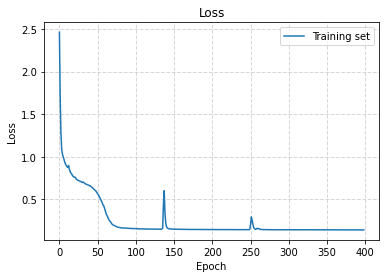

In [24]:
#vis stuff
def render_training_history(training_history):
    loss = training_history.history['loss']
    plt.title('Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(loss, label='Training set')
    plt.legend()
    plt.grid(linestyle='--', linewidth=1, alpha=0.5)
    plt.show()
render_training_history(history)

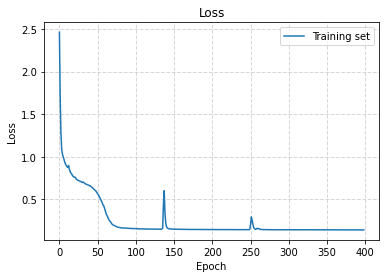

In [25]:
def render_training_history(training_history):
    loss = training_history.history['loss']
    plt.title('Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(loss, label='Training set')
    plt.legend()
    plt.grid(linestyle='--', linewidth=1, alpha=0.5)
    plt.show()
render_training_history(history)

In [26]:
tf.train.latest_checkpoint(checkpoint_dir)

model.save("baselineModel.h5")

vocab_size=VOCABULARY_SIZE
embedding_dim=256
rnn_units=1024

simplified_batch_size = 1
model_simplified = build_model(vocab_size, embedding_dim, rnn_units, simplified_batch_size)
model_simplified.load_weights(tf.train.latest_checkpoint(checkpoint_dir))
model_simplified.build(tf.TensorShape([simplified_batch_size, None]))
model_simplified.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (1, None, 256)            4352      
_________________________________________________________________
lstm_1 (LSTM)                (1, None, 1024)           5246976   
_________________________________________________________________
dense_1 (Dense)              (1, None, 17)             17425     
Total params: 5,268,753
Trainable params: 5,268,753
Non-trainable params: 0
_________________________________________________________________


In [27]:
def generate_text(model, start_string, num_generate = 1000, temperature=1.0):
    # Evaluation step (generating text using the learned model)
    
    padded_start_string = start_string
    # Converting our start string to numbers (vectorizing).
    input_indices = np.array(tokenizer.texts_to_sequences([padded_start_string]))
    # Empty string to store our results.
    text_generated = []
    # Here batch size == 1.
    model.reset_states()
    for char_index in range(num_generate):
        predictions = model(input_indices)
        # remove the batch dimension
        predictions = tf.squeeze(predictions, 0)
        # Using a categorical distribution to predict the character returned by the model.
        predictions = predictions / temperature
        predicted_id = tf.random.categorical(
            predictions,
            num_samples=1
        )[-1, 0].numpy()
        # We pass the predicted character as the next input to the model
        # along with the previous hidden state.
        input_indices = tf.expand_dims([predicted_id], 0)
        
        next_character = tokenizer.sequences_to_texts(input_indices.numpy())[0]
        text_generated.append(next_character)
        
       # output = ''.join(text_generated)
        
       # output = decodeWorkout(output)
        
    return (padded_start_string + ''.join(text_generated))

In [28]:
print((generate_text(model_simplified, '1-DL:', num_generate = maxLength, temperature=1.0))) #make sure you pass it model_simplified
print(decodeWorkout(generate_text(model_simplified, '1-DL:', num_generate = maxLength, temperature=1.0))) #make sure you pass it model_simplified

1-DL:~7~50~10~8~55~22~6~35~25~5~35~27~␣
1-DL:
25 pushups for 75 seconds with 3 second rest 
21 situps for 65 seconds with 1 second rest 
14 squats for 45 seconds with 0 second rest 


In [29]:
def generate_combos(model):
    temps = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
    DL = ["1-DL:","2-DL:","3-DL:","4-DL:","5-DL:"]
    for dl in DL:
        print(f"--------DL: {dl}--------")
        for temp in temps:
            print(f"--------TEMP: {temp}--------")
            print("TEMP: " + dl )
            outputStr = generate_text(model, dl, num_generate = maxLength, temperature = temp)
            print(outputStr)
            print("BELOW IS WHAT IT DECODES")
            print(decodeWorkout(outputStr))
        
    

In [30]:
generate_combos(model_simplified)

--------DL: 1-DL:--------
--------TEMP: 0.1--------
TEMP: 1-DL:
1-DL:~7~50~22~2~10~60~5~35~7~5~25~6~␣
BELOW IS WHAT IT DECODES
1-DL:
7 pushups for 50 seconds with 22 second rest 
2 situps for 10 seconds with 60 second rest 
5 squats for 35 seconds with 7 second rest 
5 burpees for 25 seconds with 6 second rest 
--------TEMP: 0.2--------
TEMP: 1-DL:
1-DL:~7~50~22~2~10~60~5~35~7~5~25~6~␣
BELOW IS WHAT IT DECODES
1-DL:
7 pushups for 50 seconds with 22 second rest 
2 situps for 10 seconds with 60 second rest 
5 squats for 35 seconds with 7 second rest 
5 burpees for 25 seconds with 6 second rest 
--------TEMP: 0.3--------
TEMP: 1-DL:
1-DL:~7~50~21~8~40~5~14~80~0~4~30~24~␣
BELOW IS WHAT IT DECODES
1-DL:
7 pushups for 50 seconds with 21 second rest 
8 situps for 40 seconds with 5 second rest 
14 squats for 80 seconds with 0 second rest 
4 burpees for 30 seconds with 24 second rest 
--------TEMP: 0.4--------
TEMP: 1-DL:
1-DL:~7~50~22~2~10~60~5~35~7~5~25~6~␣
BELOW IS WHAT IT DECODES
1-DL:
7 pu

In [31]:
print(decodeWorkout(generate_text(model_simplified, '5-DL:', num_generate = maxLength, temperature=1.0))) #make sure you pass it model_simplified

5-DL:
34 pushups for 35 seconds with 40 second rest 
45 situps for 45 seconds with 6 second rest 
61 squats for 65 seconds with 1 second rest 
34 burpees for 35 seconds with 6 second rest 


In [32]:
print(decodeWorkout(generate_text(model_simplified, '5-DL:', num_generate = maxLength, temperature=1.0))) #make sure you pass it model_simplified

5-DL:
35 pushups for 35 seconds with 38 second rest 
14 situps for 15 seconds with 36 second rest 
23 squats for 25 seconds with 33 second rest 
43 burpees for 45 seconds with 5 second rest 


In [33]:
print(decodeWorkout(generate_text(model_simplified, '5-DL:', num_generate = maxLength, temperature=1.0))) #make sure you pass it model_simplified

fail


In [34]:
print(model_simplified.outputs)
print(model_simplified.inputs)

[<KerasTensor: shape=(1, None, 17) dtype=float32 (created by layer 'dense_1')>]
[<KerasTensor: shape=(1, None) dtype=float32 (created by layer 'embedding_2_input')>]


In [35]:
model_simplified.save("simplified_model.h5")
model_simplified.save("simplified_model.savedmodel")


2022-04-23 15:48:56.352228: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


In [36]:
newModel = keras.models.load_model('simplified_model.h5')
print(decodeWorkout(generate_text(newModel, '5-DL:', num_generate = maxLength, temperature=1.0))) #make sure you pass it model_simplified

5-DL:
58 pushups for 60 seconds with 19 second rest 
55 situps for 60 seconds with 3 second rest 
45 squats for 45 seconds with 14 second rest 
33 burpees for 35 seconds with 13 second rest 
